In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

data = pd.read_csv(r"C:\Users\P R O B O O K\Downloads\data_jobs.csv")
df = data.copy()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#filtering fro Data Analyst data 
df_Da = df[df['job_title_short'] == ' Data Analyst'].copy()

In [3]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
#Creating a New Colum for mont number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#Sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use month name for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns= 'job_posted_month_no')


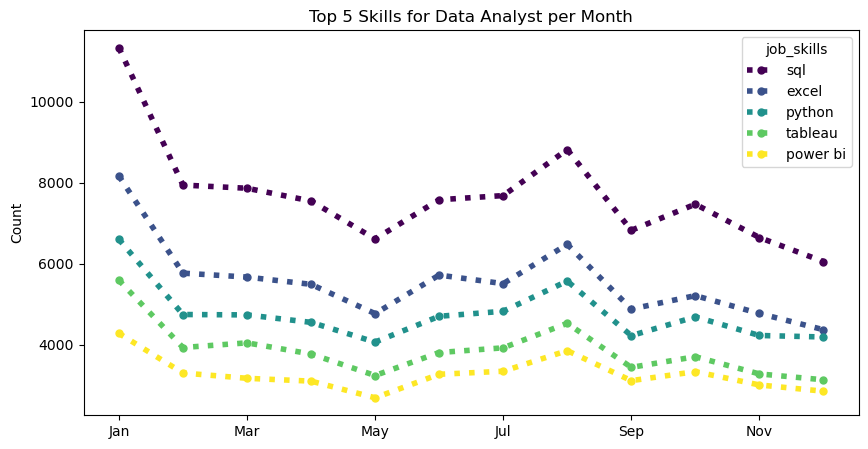

In [4]:

#Get the top 5 skills
df_DA_pivot.iloc[:,:5].plot(
    kind='line', 
    linewidth= 4,
    linestyle= ':', #options '-', '--', '_.', ':'
    colormap= 'viridis',
     marker = 'o',
     markersize = 5,
     figsize=(10,5)
)

plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Customizing our Scatter plot 

In [5]:
#Explode the job_skills into individual rows

df_explode = df.explode('job_skills')

#Calculate the average salary and count of job posting per skill
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median')
)

#limit to the top skills
skills_count = 20
skill_stats= skill_stats.sort_values(by= 'skill_count', ascending=False).head(skills_count)
skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


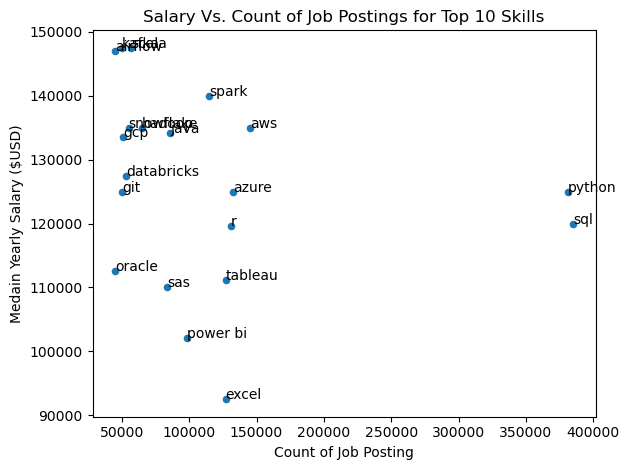

In [6]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Posting')
plt.ylabel('Medain Yearly Salary ($USD)')
plt.title('Salary Vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()

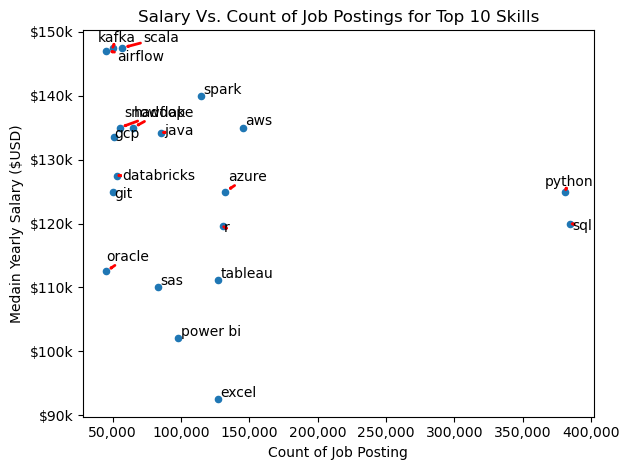

In [7]:
from adjustText import adjust_text
import matplotlib.ticker as mticker

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

texts=[]

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

ax= plt.gca()
#Formatting the Y axis to have $k
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

#Formatting the Y axis to have $k
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
adjust_text(texts, arrowprops= dict(arrowstyle="->", color='r', lw= 2))
plt.xlabel('Count of Job Posting')
plt.ylabel('Medain Yearly Salary ($USD)')
plt.title('Salary Vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()